## Data loading and summarization

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_file_name = 'MachineLearningRating_v3.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd

df = pd.read_csv('MachineLearningRating_v3.txt', sep='|')

print(df.describe())
df.info()

missing_values = df.isnull().sum().sort_values(ascending=False)


Saving MachineLearningRating_v3.zip to MachineLearningRating_v3 (1).zip


/tmp/ipython-input-10-2110541881.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MachineLearningRating_v3.txt', sep='|')


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

## Visualizations

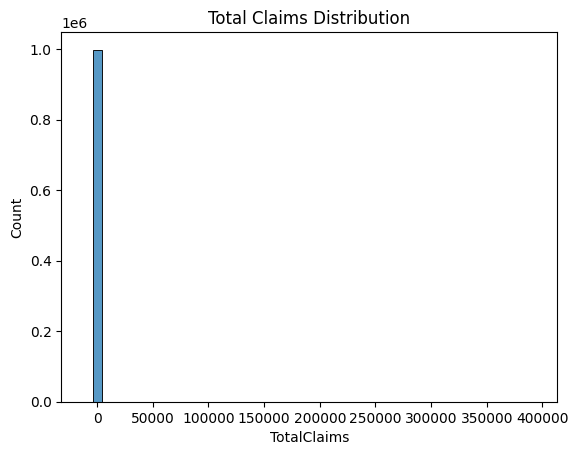

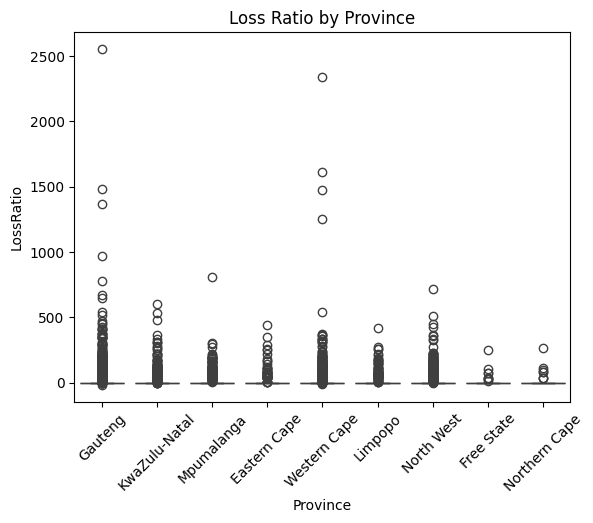

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of TotalClaims
sns.histplot(df['TotalClaims'], bins=50)
plt.title("Total Claims Distribution")
plt.show()

# Loss ratio by province
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()


## Trend over time

<Axes: title={'center': 'Claims and Premium Over Time'}, xlabel='TransactionMonth'>

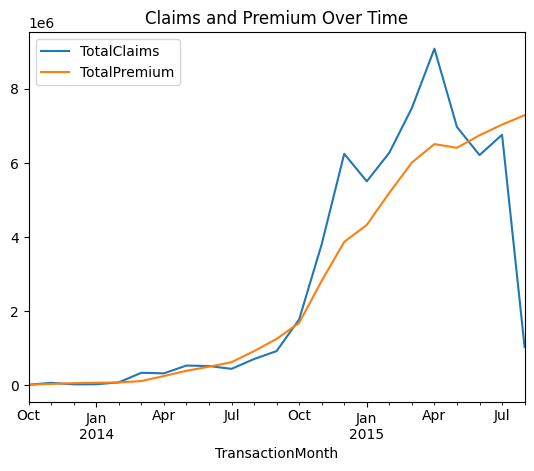

In [ ]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Select only numeric columns for summation
numeric_cols = df.select_dtypes(include=['number']).columns
monthly = df.groupby(pd.Grouper(key='TransactionMonth', freq='ME'))[numeric_cols].sum()

monthly[['TotalClaims', 'TotalPremium']].plot(title='Claims and Premium Over Time')